<a href="https://colab.research.google.com/github/DAWUNHAN/deeplearning-fundamental/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN (Convolution Neural Network)
## CNN의 장점
- Dense layer로 사용할 때는 분류 대상이 이미지에서 정중앙에 위치해 있어야 성능이 좋게 나온다.
- CNN의 경우 분류 대상이 이미지의 어디에 위치하는지 (가장자리에 있을 수도 있다) 모르는 경우에도 성능이 나온다.
</br>
</br>

## CNN 모델
- CNN은 Feature Extractor + Classifier이다.
- Classification에 맞는 최적의 feature를 추출
- 최적의 feature 추출을 위한 최적 weight 값을 계산
- 최적 feature 추출을 위한 필터 (필터 weight) 값을 계산
</br>
</br>

## 이미지 필터
- 이미지 필터링은 다양한 수식을 적용하여 이미지를 이루고 있는 픽셀 배열을 변경하여 이미지를 변형하는 것을 지칭.
</br>
</br>


## 필터 (Filter)와 커널 (Kenel)
- 필터=커널=윈도우 혼용되어서 사용된다. 
- 명확히 구분하자면 필터는 여러 개의 kernel로 구성되어 있으며, 개별 kernel은 필터 내에서 서로 다른 값을 가질 수 있다.
- 커널의 개수 = 채널의 개수

`conv_out_01 = Conv2D(filters=32, kernel_size=3(input_tensor)` 
= 커널 사이즈가 3*3를 가지는 필터 32개를 가지겠다. 
</br>
</br>

### Kernal size 특징
- 대부분이 정방 행렬 (예, 3*3, 5*5과 같은 행렬). 요즘 7*7은 거의 안쓰인다.
- Convolution Filter를 Kernel로도 지칭.
- 커널 크기가 클수록 입력 feature map에서 더 큰 feature 정보를 가져올 수 있음.
  - 더 많은 연산량과 파라미터가 필요하다. 
- Receptive Field (수용장) : 입력 (Image 또는 Feature map)에서 feature를 만드는 영역의 기본 크기 (size)
</br>
</br>

## Feature Map
- 컨볼루션 연산을 적용한 결과
- 컨볼루션 레이어를 적용할 때마다 여러개의 feature map이 나온다. 
</br>
</br>

## Stride 개요
- 입력 데이터 (원본 이미지 또는 입력 feature map)에 Conv Filter를 적용할 때 sliding window가 이동하는 간격
- stride를 키우면 공간적인 feature 특성을 손실할 가능성이 높아지지만, 이것이 반듯이 손실을 의미하지는 않음. 오히려 불필요한 특성을 제거하는 효과를 가져올 수 있다. 또한 convolution 연산 속도를 향상 시킨다.

## Padding
- Filter를 적용하여 Conv 연산 수행 시 출력 Feature Map이 입력 Feature Map 대비 계속적으로 작아지는 것을 막기 위해 적용
- Filter 적용 전 보존하려는 Feature Map 크기에 맞게 입력 Feature Map의 좌우, 상하 끝에 각각 열과 행을 추가 한 뒤 0을 채워 Feature Map 사이즈를 증가시킨다. 
- 즉 기존 피처 맵 4*4에 제로 패딩을 하면 6*6이 된다. 거기에 2*2 필터를 적용하면 기존 크기와 같이 4*4가 된다. 
- 모서리 주변의 Conv 연산 횟수가 증가되어 모서리 주변 feature 들의 특징을 보다 강화한다.
- Keras에서 Conv2D()인자로 padding='same'을 넣어주면 자동으로 입력 feature map의 크기를 출력 feature map에서 유지할 수 있게 padding 면적을 계산하여 적용한다. 
- padding='valid'를 적용하면 별도의 padding을 적용하지 않고, Conv 연산 수행.
</br>
</br>

## Pooling
- Conv 적용된 feature map의 일정 영역 별로 하나의 값을 추출하여 (최대값 또는 평균값) feature map의 사이즈를 줄인다. 일반적으로 Pooling 크기와 stride를 동일하여 부여하여 모든 값이 한번만 처리되게 한다. 
- 보통은 Conv -> ReLU activation 적용 후, activation map에 pooling 적용.
- Pooling은 비슷한 feature들이 서로 다른 이미지에서 위치가 달라지면서 다르게 해석되는 현상을 중화 시켜준다.
- Feature Map의 크기를 줄이므로 Computation 연산 성능 향상 시킨다. 
- 근래에는 pooling을 안쓰려는 추세이다. 
- 과거 LeNet, AlexNet, VGG의 경우 Cnn(Stride/Padding) -> Activation -> Pooling. 
- ResNet 이후부터는 Pooling을 자제하고 stride를 이용하여 네트워크를 구성하는 편이다. 


## Convolution 실습

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

### Conv2D 적용하기
* Conv2D() 를 모델에 적용 시에는 반드시 입력은 배치 크기를 제외하고 3차원이 되어야 함(즉 배치를 포함하면 4차원)  

In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
print('x type:', type(x), 'x:', x)

'''
TensorSpec(shape=(None, 28, 28, 4)를 보면 None은 배치 사이즈를 의미한다.
4는 필터 개수를 의미.
1개의 필터는 무조건 3차원 (입력 인풋, 배치 제외하고 3차원). 
피처 맵도 3차원.
채널(커널)이 2차원. 
입력으로 들어오는 채널의 차원((28, 28, 1)에서 1을 의미)과 커널의 수가 같다. (즉 여기서 1개의 필터의 커널 수는 1개)
'''

x type: <class 'keras.engine.keras_tensor.KerasTensor'> x: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


### Pooling 적용하기

In [3]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x)
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 16), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


### CNN 모델 생성

In [4]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

'''
Param # : 320이 나온 이유 => 9*32 + 32 = 320
Param # : 18496이 나온 이유 => 3*3*32*64 + 64 = 18496 
'''

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.layers import Dense, Flatten

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야함. 
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

'''
max_pooling 층에서는 파라미터 없음.
'''

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           

### Fashion MNIST 데이터 전처리후 모델 학습

In [6]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 12s 7ms/step - loss: 0.4341 - accuracy: 0.8455 - val_loss: 0.3318 - val_accuracy: 0.8802
Epoch 2/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2686 - accuracy: 0.9035 - val_loss: 0.2674 - val_accuracy: 0.9058
Epoch 3/30
399/399 [==============================] - 3s 6ms/step - loss: 0.2164 - accuracy: 0.9222 - val_loss: 0.2553 - val_accuracy: 0.9049
Epoch 4/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1749 - accuracy: 0.9360 - val_loss: 0.2258 - val_accuracy: 0.9201
Epoch 5/30
399/399 [==============================] - 3s 6ms/step - loss: 0.1452 - accuracy: 0.9455 - val_loss: 0.2151 - val_accuracy: 0.9270
Epoch 6/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1178 - accuracy: 0.9577 - val_loss: 0.2360 - val_accuracy: 0.9183
Epoch 7/30
399/399 [==============================] - 3s 6ms/step - loss: 0.0925 - accuracy: 0.9658 - val_loss: 0.2378 - val_accuracy: 0.9230
Epoch

### 모델 성능 평가

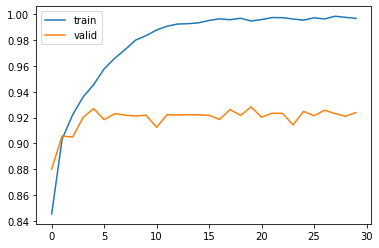

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [10]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 7ms/step - loss: 0.5936 - accuracy: 0.9165


[0.5936262011528015, 0.9164999723434448]

### Dropout을 적용하여 Fully Connected Layer의 오버피팅 조정
* CNN은 일반적으로 Dense Layer보다는 파라미터수(weight 수) 작음
* 하지만 많은 Filter 들을 적용하고 이를  Fully Connected Layer로 연결 시 파라미터 수가 늘어남. 
* Flatten() 이후 Dropout을 적용하여 특정 비율로 FC Layer 연결을 누락 적용. 

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                           

In [12]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 4s 9ms/step - loss: 0.4633 - accuracy: 0.8348 - val_loss: 0.3595 - val_accuracy: 0.8656
Epoch 2/30
399/399 [==============================] - 3s 7ms/step - loss: 0.3127 - accuracy: 0.8878 - val_loss: 0.2833 - val_accuracy: 0.8953
Epoch 3/30
399/399 [==============================] - 3s 8ms/step - loss: 0.2625 - accuracy: 0.9045 - val_loss: 0.2483 - val_accuracy: 0.9098
Epoch 4/30
399/399 [==============================] - 3s 9ms/step - loss: 0.2303 - accuracy: 0.9144 - val_loss: 0.2292 - val_accuracy: 0.9164
Epoch 5/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2082 - accuracy: 0.9228 - val_loss: 0.2232 - val_accuracy: 0.9193
Epoch 6/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1856 - accuracy: 0.9308 - val_loss: 0.2074 - val_accuracy: 0.9248
Epoch 7/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1664 - accuracy: 0.9382 - val_loss: 0.2055 - val_accuracy: 0.9239
Epoch 

40/40 [==============================] - 0s 5ms/step - loss: 0.3332 - accuracy: 0.9299


[0.3332490622997284, 0.9298999905586243]

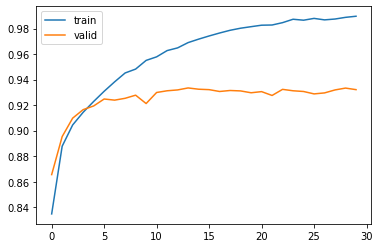

In [13]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [14]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

def create_model():
    input_tensor = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(2)(x)

    #x = Dropout(rate=0.5)(x)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu')(x)
    X = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

model = create_model()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_1 (Dropout)         (None, 10816)             0         
                                                           

In [15]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 4s 8ms/step - loss: 0.4366 - accuracy: 0.8456 - val_loss: 0.3226 - val_accuracy: 0.8854
Epoch 2/30
399/399 [==============================] - 3s 8ms/step - loss: 0.2889 - accuracy: 0.8965 - val_loss: 0.2665 - val_accuracy: 0.9008
Epoch 3/30
399/399 [==============================] - 4s 11ms/step - loss: 0.2406 - accuracy: 0.9116 - val_loss: 0.2390 - val_accuracy: 0.9110
Epoch 4/30
399/399 [==============================] - 4s 11ms/step - loss: 0.2089 - accuracy: 0.9218 - val_loss: 0.2354 - val_accuracy: 0.9118
Epoch 5/30
399/399 [==============================] - 4s 10ms/step - loss: 0.1846 - accuracy: 0.9311 - val_loss: 0.2175 - val_accuracy: 0.9202
Epoch 6/30
399/399 [==============================] - 3s 8ms/step - loss: 0.1616 - accuracy: 0.9397 - val_loss: 0.2078 - val_accuracy: 0.9266
Epoch 7/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1442 - accuracy: 0.9452 - val_loss: 0.2012 - val_accuracy: 0.9276
Epo

40/40 [==============================] - 0s 5ms/step - loss: 0.3682 - accuracy: 0.9315


[0.36821886897087097, 0.9315000176429749]

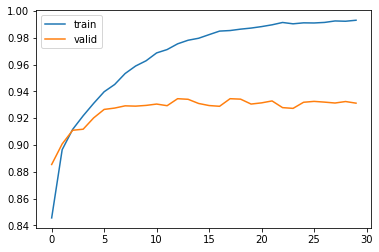

In [16]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

### 입력 이미지는 배치를 포함하여 4차원이 되어야 함(즉 배치를 제외하면 3차원)
* Conv2D()는 입력으로 배치를 제외하고 3차원 입력이 되어야 함. 
* 하지만 2차원으로 입력해도 Input(shape=(28, 28, 1)) 에서 3차원으로 변경함. 
* 명확하게는 2차원 Grayscale이미지더라도 입력 numpy 이미지 배열에서 배치를 제외한 3차원 입력을 만들어 주는게 좋음. 

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('before reshape:', train_images.shape, test_images.shape)
train_images = np.reshape(train_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))
print('after reshape:', train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

before reshape: (60000, 28, 28) (10000, 28, 28)
after reshape: (60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
(51000, 28, 28, 1) (51000, 10) (9000, 28, 28, 1) (9000, 10) (10000, 28, 28, 1) (10000,)


In [18]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_3 (Dropout)         (None, 10816)             0         
                                                           

40/40 [==============================] - 0s 5ms/step - loss: 0.3944 - accuracy: 0.9240


[0.3944369852542877, 0.9240000247955322]

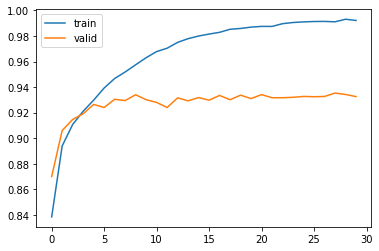

In [19]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

### Stride가 1이고 Padding이 없는 경우
* I는 입력 Feature Map의 크기, F는 Filter의 크기(Kernel size), P는 Padding(정수), S는 Strides(정수)
* O = (I - F + 2P)/2 + 1 = (5 - 3 + 0 )/1 + 1 = 3

In [20]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=1)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


### Stride가 1이고 Padding이 1인 경우
* O = (I - F + 2P)/2 + 1 = (5 - 3 + 2 )/1 + 1 = 5

In [21]:
input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 5, 5, 1)


In [22]:
# ZeroPadding2D Layer를 이용하여 padding을 수동으로 적용. 
from tensorflow.keras.layers import ZeroPadding2D

input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
print('shape after padding:', padded_input.shape)
x = Conv2D(filters=1, kernel_size=3, strides=1)(padded_input)
print('x.shape:', x.shape)


shape after padding: (None, 7, 7, 1)
x.shape: (None, 5, 5, 1)


### Stride가 2이고 Padding이 없는 경우 
* O = (I - F + 2P)/2 + 1 = (5 - 3)/2 + 1 = 2

In [23]:
input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 2, 2, 1)


### Stride가 2이고 Padding은 1 적용
* O = (I - F + 2P)/2 + 1 = (5 - 3 + 2)/2 + 1 = 3

In [24]:
input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
print('shape after padding:', padded_input.shape)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)
print('x.shape:', x.shape)

shape after padding: (None, 7, 7, 1)
x.shape: (None, 3, 3, 1)


### 입력이 6X6에서 Stride가 2 적용
* O = (I - F + 2P)/2 + 1 = (6 - 3 + 0)/2 + 1 = 2.5 = 2

In [25]:
input_tensor = Input(shape=(6, 6, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 2, 2, 1)


In [26]:
input_tensor = Input(shape=(6, 6, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='same')(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


In [27]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='valid')(padded_input)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


In [28]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=((1, 0),(1,0)))(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


### Maxpooling 적용

In [29]:
input_tensor = Input(shape=(223, 223, 1))
x = MaxPooling2D(2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 111, 111, 1)
